---
**Report for EMAT30008**

Author: Ben Winstanley, yy23737@bristol.ac.uk

---

***Software Demo***

In [1]:
# Import our library and other packages needed for the demo
import numpy as np
import matplotlib.pyplot as plt
from scicomp.odefunctions import *

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



*1)*   We consider the Brusselator system:

$\frac{dx}{dt} = A + x^2 y - (B + 1)x$

$\frac{dy}{dt} = B x - x^2 y$

which undergoes a supercritical Hopf bifurcation for $B=1+A^2$. We fix $A=1$ (so our bifurcation occurs at $B=2$).

*(a)* We fix $B=3$ and calculate the solution for $0\leq t \leq 20$, starting from initial state $(1,1)$. We use the Euler timestepping method with a step size of $0.01$, and we plot both variables over time on a single figure.

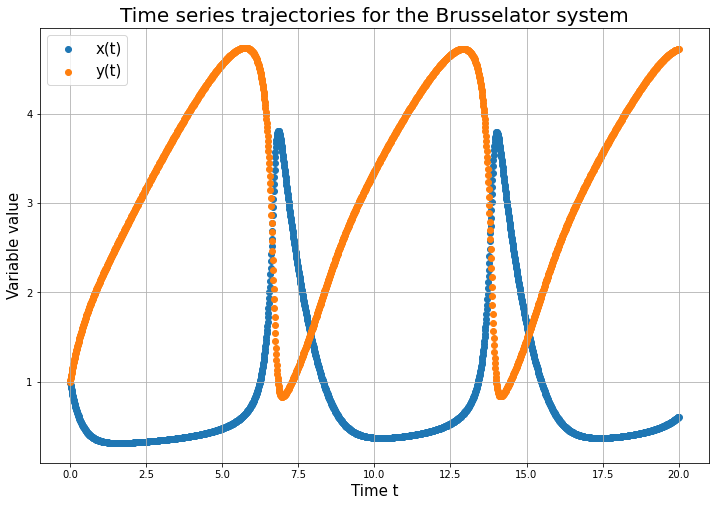

In [2]:
# First define the system ODE as a function
def brusselator(params: list[float], x:np.ndarray, t:float):
    ''' RHS of the Brusselator ODE.'''

    # Unpack parameters and variables
    A,B = params
    x,y = x[0], x[1]

    # Calculate each expression
    dxdt = A + (x**2)*y - (B+1)*x
    dydt = B*x - (x**2)*y
    return np.array(([dxdt, dydt]))

# Call the solve_to function, using the Euler method with a step size of 0.01
params = [1,3]
x_init = np.array(([1,1]))
t_init, t_final = 0, 20
deltat_max = 0.01
method = 'Euler'
store = solve_to(brusselator, params, x_init, t_init, t_final, deltat_max, method)

# Plot the x and y solutions versus time
tvals = store[:,0]
xvals, yvals = store[:,1], store[:,2]
plt.figure(figsize=[12,8])
plt.scatter(tvals,xvals, label='x(t)')
plt.scatter(tvals, yvals, label='y(t)')
plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Time t", fontsize=15)
plt.ylabel("Variable value", fontsize=15)
plt.title("Time series trajectories for the Brusselator system", fontsize=20)
plt.show()


*(b)* We use numerical shooting to identify the coordinates of a starting point along the limit cycle seen above, along with its period. We use a derivative phase condition. From the plot above we use $7.5$ as an estimate for the period, and $(1.5,1.5)$ as an intial condition.

In [3]:
init_period_guess = 7.5
init_point_guess = [1.5,1.5]
# Call the find_limit_cycle function with these guesses
period, init_point = find_limit_cycle(brusselator,params, init_point_guess, init_period_guess,
                                      1,'derivative')

A limit cycle was found:
Period: 7.16 ,
Starting state: [0.37 3.51] .


*(c)* We use natural-parameter continuation to find the branch of limit cycles emerging from the Hopf bifurcation at $B=2$. We take steps backwards from our discovered limit cycle at $B=3$.

In [5]:
vary_param_index = 1
vary_param_start = 3
vary_param_step = -0.05
init_period_guess = period
init_point_guess = np.array(([1.5,1.56]))
num_steps = 20
method = 'NPC'
phase_condition = 'constant'
constant_value = 1

# Call the limit_cycle_continuation function to vary B in steps of 0.01 from 2 to 3.
# We use natural-parameter continuation with 100 steps, and for each limit cycle
# we search with a derivative phase condition
pair_store, B_store = limit_cycle_continuation(brusselator, params,
                                                vary_param_index, vary_param_start,
                                                vary_param_step,init_point_guess,
                                                init_period_guess, num_steps,
                                                method, 1, phase_condition, constant_value)

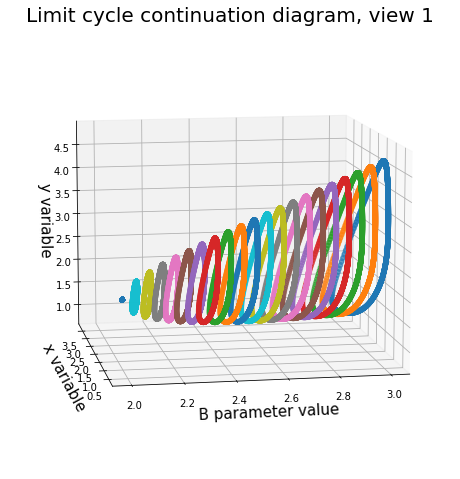

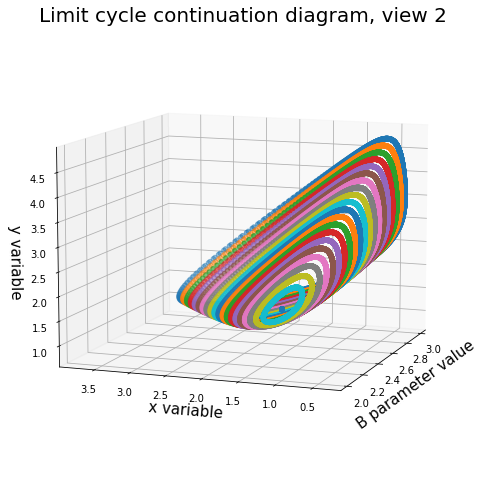

In [6]:
# We plot our findings on a pair of 3D plots
fig = plt.figure(figsize = (8,12))
ax = plt.axes(projection='3d')
for index, B in enumerate(B_store):
    params[vary_param_index]=B
    period, init_point, = pair_store[index,0], pair_store[index,1:]
    store = solve_to(brusselator,params,init_point,0,2*period,0.01)
    yvals, zvals = store[:,1], store[:,2]
    xvals = B*np.ones([len(yvals)])
    ax.scatter(xvals,yvals,zvals, zorder=10*index)
ax.view_init(10,260)
plt.title("Limit cycle continuation diagram, view 1",pad=-20 ,fontsize=20)
ax.set_xlabel("B parameter value",fontsize=15)
ax.set_ylabel("x variable",fontsize=15)
ax.set_zlabel("y variable",fontsize=15)
plt.show()

fig = plt.figure(figsize = (8,12))
ax = plt.axes(projection='3d')
for index, B in enumerate(B_store):
    params[vary_param_index]=B
    period, init_point, = pair_store[index,0], pair_store[index,1:]
    store = solve_to(brusselator,params,init_point,0,2*period,0.01)
    yvals, zvals = store[:,1], store[:,2]
    xvals = B*np.ones([len(yvals)])
    ax.scatter(xvals,yvals,zvals, zorder=10*index)
ax.view_init(10,200)
plt.title("Limit cycle continuation diagram, view 2",pad=-20 ,fontsize=20)
ax.set_xlabel("B parameter value",fontsize=15)
ax.set_ylabel("x variable",fontsize=15)
ax.set_zlabel("y variable",fontsize=15)
plt.show()

---------

*2)* We consider the extended Hopf bifurcation normal form system:

$\frac{dx}{dt} = \beta x - y - z + x(x^2 + y^2 + z^2) - x(x^2 + y^2 + z^2)^2$

$\frac{dy}{dt} = x + \beta y - z + y(x^2 + y^2 + z^2) - y(x^2 + y^2 + z^2)^2$

$\frac{dz}{dt} = x + y + \beta z + z(x^2 + y^2 + z^2) - z(x^2 + y^2 + z^2)^2$,

which undergoes a subcritical Hopf bifurcation at $\beta = 0$.

*(a)* We fix $\beta=1$ and calculate the solution for $0\leq t \leq 10$, starting from initial state $(1,0,-1)$. We use the 4th-order Runge-Kutta timestepping method with a step size of $0.01$, and we plot both variables over time on a single figure.

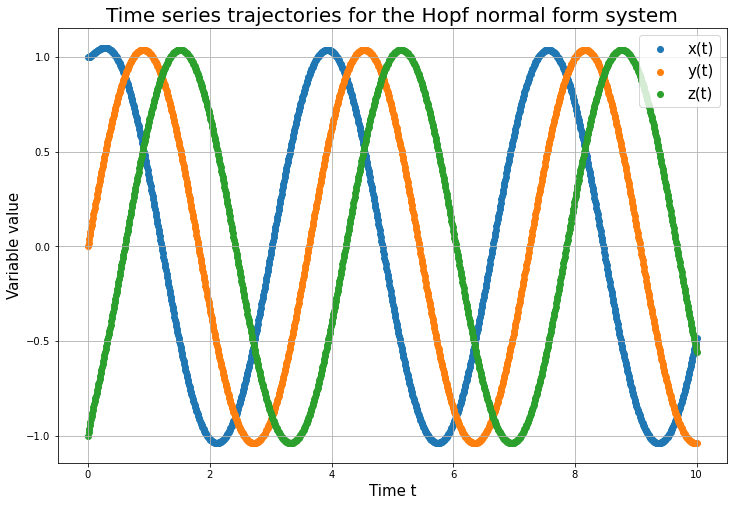

In [7]:
# First define the system ODE as a function
def extended_hopf(params,x,t):
    ''' RHS of the extended Hopf bifurcation normal form ODE.'''
    
    # Unpack parameters and variables
    beta = params[0]
    x, y, z = x[0], x[1], x[2]

    dxdt = beta * x - y - z + x * (x**2 + y**2 + z**2) - x * (x**2 + y**2 + z**2)**2
    dydt = x + beta * y - z + y * (x**2 + y**2 + z**2) - y * (x**2 + y**2 + z**2)**2
    dzdt = x + y + beta * z + z * (x**2 + y**2 + z**2) - z * (x**2 + y**2 + z**2)**2
    return np.array(([dxdt, dydt, dzdt]))

# Call the solve_to function, using the RK4 method with a step size of 0.01
params = [1]
x_init = np.array(([1,0,-1]))
t_init, t_final = 0, 10
deltat_max = 0.01
method = 'RK4'
store = solve_to(extended_hopf, params, x_init, t_init, t_final, deltat_max, method)

# Plot the x and y solutions versus time
tvals = store[:,0]
xvals, yvals, zvals = store[:,1], store[:,2], store[:,3]
plt.figure(figsize=[12,8])
plt.scatter(tvals,xvals, label='x(t)')
plt.scatter(tvals, yvals, label='y(t)')
plt.scatter(tvals, zvals, label='z(t)')
plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Time t", fontsize=15)
plt.ylabel("Variable value", fontsize=15)
plt.title("Time series trajectories for the Hopf normal form system", fontsize=20)
plt.show()


*(b)* We use numerical shooting to identify the coordinates of a starting point along the limit cycle seen above, along with its period. We use a constant phase condition. From the plot above we use $4$ as an estimate for the period, $(1,0.6,-0.4)$ as an intial condition, and $1$ as a constant value.

In [8]:
init_period_guess = 4
init_point_guess = [1,0.6,-0.4]
phase_condition = 'constant'
constant_value = 1
# Call the find_limit_cycle function with these guesses
period, init_point = find_limit_cycle(extended_hopf,params, init_point_guess, init_period_guess,
                                      1, phase_condition,constant_value)

A limit cycle was found:
Period: 3.63 ,
Starting state: [ 1.    0.74 -0.26] .


*(c)* We use pseudo-arclength continuation to find the branch of limit cycles emerging from the Hopf bifurcation at $\beta=0$. We take steps backwards from our discovered limit cycle at $B=1$.

In [46]:
vary_param_index = 0
vary_param_start = 1
vary_param_step = -0.005
init_period_guess = period
init_point_guess = init_point
num_steps = 100
method = 'PAC'
phase_condition = 'constant'
constant_value = 1

# Call the limit_cycle_continuation function to vary B in steps of 0.01 from 2 to 3.
# We use natural-parameter continuation with 100 steps, and for each limit cycle
# we search with a derivative phase condition
pair_store, beta_store = limit_cycle_continuation(extended_hopf, params,
                                                vary_param_index, vary_param_start,
                                                vary_param_step,init_point_guess,
                                                init_period_guess, num_steps,
                                                method, 1, phase_condition, constant_value)

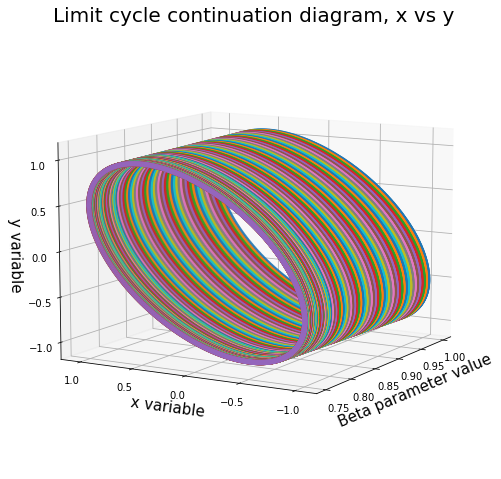

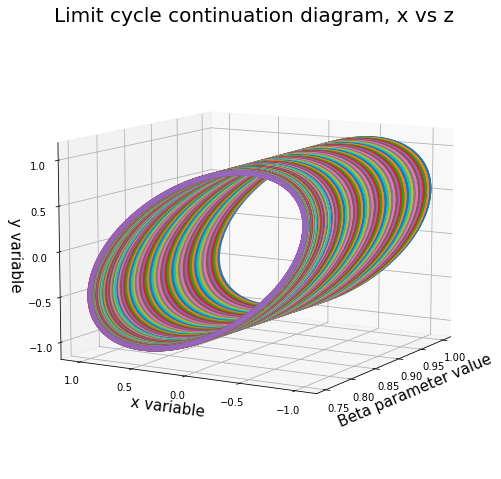

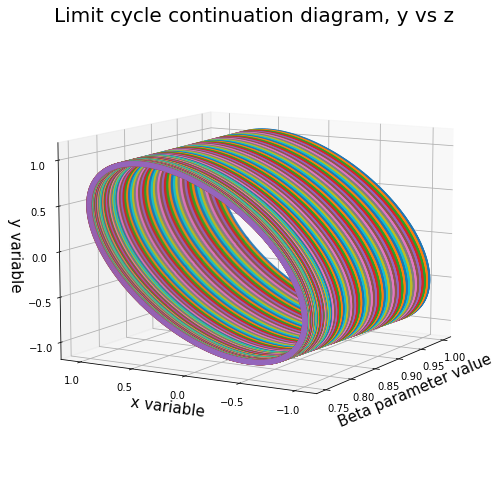

In [47]:
# We plot our findings on 3 3D plots, showing the relations between pairs of variables
fig = plt.figure(figsize = (8,12))
ax = plt.axes(projection='3d')
for index, beta in enumerate(beta_store):
    params[vary_param_index]=beta
    period, init_point, = pair_store[index,0], pair_store[index,1:]
    store = solve_to(extended_hopf,params,init_point,0,2*period,0.01)
    yvals, zvals = store[:,1], store[:,2]
    xvals = beta*np.ones([len(yvals)])
    ax.scatter(xvals,yvals,zvals, zorder=10*index)
ax.view_init(10,210)
plt.title("Limit cycle continuation diagram, x vs y",pad=-20 ,fontsize=20)
ax.set_xlabel("Beta parameter value",fontsize=15)
ax.set_ylabel("x variable",fontsize=15)
ax.set_zlabel("y variable",fontsize=15)
plt.show()

fig = plt.figure(figsize = (8,12))
ax = plt.axes(projection='3d')
for index, beta in enumerate(beta_store):
    params[vary_param_index]=beta
    period, init_point, = pair_store[index,0], pair_store[index,1:]
    store = solve_to(extended_hopf,params,init_point,0,2*period,0.01)
    yvals, zvals = store[:,1], store[:,3]
    xvals = beta*np.ones([len(yvals)])
    ax.scatter(xvals,yvals,zvals, zorder=10*index)
ax.view_init(10,210)
plt.title("Limit cycle continuation diagram, x vs z",pad=-20 ,fontsize=20)
ax.set_xlabel("Beta parameter value",fontsize=15)
ax.set_ylabel("x variable",fontsize=15)
ax.set_zlabel("y variable",fontsize=15)
plt.show()

fig = plt.figure(figsize = (8,12))
ax = plt.axes(projection='3d')
for index, beta in enumerate(beta_store):
    params[vary_param_index]=beta
    period, init_point, = pair_store[index,0], pair_store[index,1:]
    store = solve_to(extended_hopf,params,init_point,0,2*period,0.01)
    yvals, zvals = store[:,2], store[:,3]
    xvals = beta*np.ones([len(yvals)])
    ax.scatter(xvals,yvals,zvals, zorder=10*index)
ax.view_init(10,210)
plt.title("Limit cycle continuation diagram, y vs z",pad=-20 ,fontsize=20)
ax.set_xlabel("Beta parameter value",fontsize=15)
ax.set_ylabel("x variable",fontsize=15)
ax.set_zlabel("y variable",fontsize=15)
plt.show()

---------

*3)* We consider the Poisson equation given by:

$ D\frac{d^2 u}{d x^2} + \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{\frac{-x^2}{ 2 \sigma^2 }}$ = 0

where $\sigma > 0$ is a parameter, and $-1 \leq x \leq 1$, with boundary conditions $u(-1)=u(1)=-1$, and diffusivity constant $D=1$.

*(a)* We set $\sigma = 0.5$ and solve this poisson equation by method of finite differences. Since the gaussian source term is only dependent on $x$, our method automatically uses Numpy's linalg package to solve.

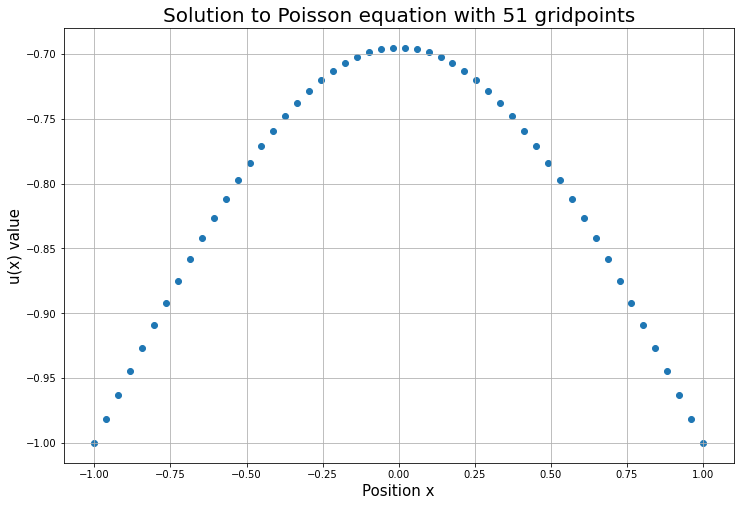

In [53]:
# We first construct the matrix A and vector b which encapsulate 
# the diffusion term and dirichlet boundary conditions on each side
num_grid_points = 51
grid_bounds = [-1,1]
left_boundary_vals, right_boundary_vals = [-1], [-1]
left_boundary_type, right_boundary_type = 'Dirichlet', 'Dirichlet'
A_matrix, b_vec, left_dirichlet_val, right_dirichlet_val = bvp_construct_A_and_b(num_grid_points,
                                                                            grid_bounds,
                                                                            left_boundary_vals,
                                                                            right_boundary_vals,
                                                                            left_boundary_type,
                                                                            right_boundary_type)

# We then specify a function q to encode the source term
def gaussian(x,u,mu):
    '''Function to encode the source term in our Poisson equation'''
    constant = 1/(np.sqrt(2*np.pi*(mu**2)))
    exp_term = np.exp((-(x)**2)/(2*(mu)**2))
    return constant*exp_term

# We pass these pieces of information into our main solver function
diffusivity = 1
sigma = 0.5
solution, xvals = finite_diff_bvp_solver(num_grid_points, diffusivity, grid_bounds,
                                         A_matrix, b_vec, left_dirichlet_val,right_dirichlet_val,
                                         gaussian,False,sigma)

# We then plot the solution
plt.figure(figsize=[12,8])
plt.scatter(xvals, solution)
plt.grid()
plt.xlabel("Position x", fontsize=15)
plt.ylabel("u(x) value", fontsize=15)
plt.title("Solution to Poisson equation with 51 gridpoints", fontsize=20)
plt.show()
